# Trying sklearn

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

load the iris datset, the target is already stored as integers

In [2]:
iris = datasets.load_iris()
x = iris.data[ :, [ 2, 3 ] ]
y = iris.target
np.unique(y)

array([0, 1, 2])

`train_test_split` Split the dataset into 70 percent training and 30 percent testing 

In [3]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 0 )

`StandardScaler` use .fit and .transform the perform the feature scaling

In [4]:
sc = StandardScaler()
sc.fit(x_train)
x_train_sd = sc.transform(x_train)
x_test_sd  = sc.transform(x_test)

Using sklearn's Perceptron API.

- .fit( dataset, target )
- .predict( dataset ), returns in np.array format

In [5]:
ppn = Perceptron( n_iter = 40, eta0 = 0.1, random_state = 0 )
ppn.fit( x_train_sd, y_train )
y_pred = ppn.predict( x_test_sd )
print ( "Missclassfied samples %d" % ( y_test != y_pred ).sum() )
print ( "Accuracy %.2f" % accuracy_score( y_test, y_pred ) )

Missclassfied samples 4
Accuracy 0.91


## Logistic Regression

Sigmoid function. Takes real number values as input and transform them into values in the range [ 0 , 1 ]

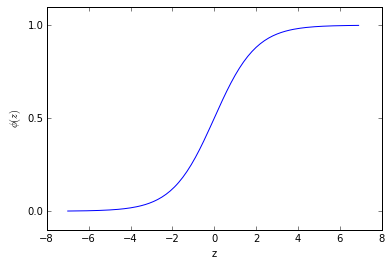

In [6]:
def sigmoid(z) :
    return 1.0 / ( 1.0 + np.exp(-z) )
z = np.arange( -7 , 7, 0.1 )
phi_z = sigmoid(z)

plt.plot( z, phi_z )
plt.yticks( [ 0.0, 0.5, 1.0 ] )
plt.ylim( -0.1, 1.1 )
plt.xlabel( "z" )
plt.ylabel( "$\phi(z)$" )
plt.show()

fit a logistic regression and predict the class's probability via `predict_proba`. Print out the probability of the first observation belonging to each class.

In [7]:
lr = LogisticRegression( C = 1000.0, random_state = 0 )
lr.fit( x_train_sd, y_train )
pred_lr = lr.predict_proba( x_test_sd )
pred_lr[1]

array([  6.08753106e-04,   9.99285569e-01,   1.05678028e-04])


The concept for the parameter C. It's the inverse of regularization, so the smaller it is, the larger you penalize the model for getting too complex.

- `Variance` Measures the consistency of the model. e.g. A **high variance** means that model is too complex and does not generalize well to unseen data
- `Bias` Measures the systematic error that's not due to randomness. e.g. A **high bias** means that the model is underfitting. Meaning that the model is not complex enough to capture the pattern in the training data

## Support Vector Machine

Use `SGDClassifier` for online learning, which scales better with large dataset.

In [8]:
svm1 = SVC( kernel = "linear", C = 1.0, random_state = 0 )
svm2 = SGDClassifier( loss = "hinge" ) # loss = "log" for logistic regression
svm1.fit( x_train_sd, y_train )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

Using Radial kernel ( there're other types, but this one is the most commonly used ) to solve non-linear classification problem.

[Link](https://www.quora.com/What-are-C-and-gamma-with-regards-to-a-support-vector-machine) to a few slightly *more* detailed explanation regarding the parameter gamma and C on Quora.

- `C` : A large C gives you low bias and high variance, since the model model will aim to classify all the data points correctly, thus have the higher risk of overfitting the training data.
- `gamma` The parameter that controls the radial kernel. A small value will give a softer decision boundary.

In [9]:
svm = SVC( kernel = "rbf", random_state = 0, gamma = 0.1, C = 10.0 )
svm.fit( x_train_sd, y_train )

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

## Decision Tree

Note that Although feature scaling may be desired for visualization and model comparision purposes. Feature scaling is not a requirement for tree-type algorithms.

In [10]:
tree = DecisionTreeClassifier( criterion = "entropy", max_depth = 3, random_state = 0 )
tree.fit(  x_train, y_train )

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [11]:
# @n_jobs = parallelize the model training using multiple cores
forest = RandomForestClassifier( criterion = "entropy", n_estimators = 10, random_state = 1, n_jobs = 2 )
forest.fit( x_train, y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

## K-nearest neighbors

The algorithm is very susceptible to the *curse of dimensionality*. Meaning that due to the high dimensionality, even the closest neighbors become too far away to give a good estimate.

In [12]:
knn = KNeighborsClassifier( n_neighbors = 5 ) 
knn.fit( x_train_sd, y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')